In [12]:
using FFTW
using Plots
using WAV
using DSP

In [2]:
bird = wavread("bird_sound.wav")

([0.0018616290780358287 0.0032349620044557024; -0.0006103701895199438 0.0005493331705679495; … ; 0.0017090365306558428 -0.0008239997558519242; 0.001281777397991882 -0.0004882961516159551], 22050.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x22, 0x56, 0x00, 0x00, 0x88, 0x58, 0x01, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x41, 0x52, 0x54, 0x10, 0x00  …  0x35, 0x38, 0x2e, 0x34, 0x35, 0x2e, 0x31, 0x30, 0x30, 0x00])])

## Dftfreq

Nasze własne dftfreq

In [3]:
function dftfreq(n, fs) #n-window length, fs-sample spacing 
    if n >= 1
        f = zeros(n)
        if iseven(n)
            positive = collect(0:((n/2)-1))
            negative = collect((-n/2):1:(-1))
        else isodd(N)
            positive = collect(0:((n-1)/2))
            negative = collect((-(n-1)/2):1:(-1))
        end
        len = length(positive)
        f[1:len] = positive
        f[(len + 1):end] = negative
        return f*fs/n
    else
        throw(ArgumentError("n powinno być większe równe 1"))
    end
end

dftfreq (generic function with 1 method)

Przyjmijmy sobie, że fs = 1

In [4]:
N = length(bird[1][:,1])

166896

In [5]:
fft_freq = fftfreq(N, 1)
dft_freq = dftfreq(N, 1)
isapprox(fft_freq, dft_freq)

true

In [6]:
isapprox(fftfreq(10, 7), dftfreq(10, 7))

true

In [7]:
isapprox(fftfreq(14567, 0.6), dftfreq(14567, 0.6))

true

In [8]:
isapprox(fftfreq(98764, 9), dftfreq(98764, 9))

true

In [9]:
fftfreq(0, 0.6)

LoadError: [91mArgumentError: Condition 1 ≤ n_nonnegative ≤ n isn't satisfied.[39m

In [10]:
dftfreq(0, 0.6)

LoadError: [91mArgumentError: n powinno być większe równe 1[39m

In [92]:
fft1 = fft(bird[1][:,1]);

In [106]:
plot(dftfreq(N, bird[2]),real.(fft1),linecolor = :orchid, x_lims = (1,10000), label = :none, xlabel = "częstotliwość",
    ylabel = "amplituda")

# Okienkowanie

1) nasze przykładowe funkcje okienkowania

In [13]:
hanning_f = [0.5*(1+cos(2pi*x)) for x in LinRange(-1/2,1/2,1024)]
g = Windows.hanning(1024) #wbudowana
isapprox(g,hanning_f)

true

In [14]:
hamming_f = [0.54 + 0.46*cos(2pi*x) for x in LinRange(-1/2,1/2,1024)]
hm = Windows.hamming(1024) #wbudowana
isapprox(hamming_f,hm)

true

In [15]:
cosine_f = [cos(π*x) for x in LinRange(-1/2,1/2,1024)]
c = Windows.cosine(1024) #wbudowana
isapprox(cosine_f,c)

true

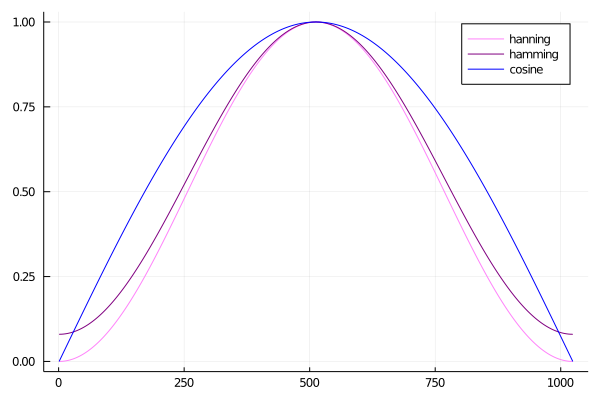

In [16]:
plot(hanning_f,linecolor = :orchid1, label = "hanning")
plot!(hamming_f, linecolor = :purple, label = "hamming")
plot!(cosine_f,linecolor = :blue, label = "cosine")

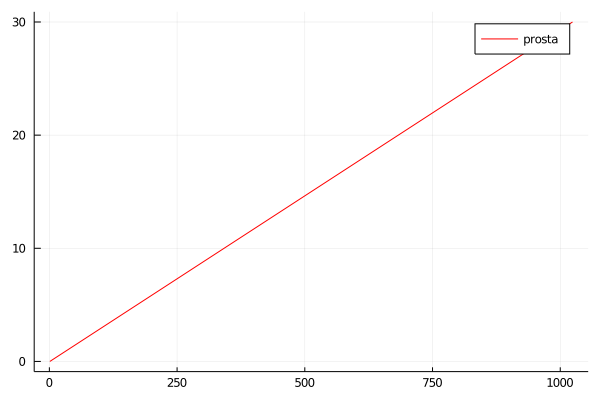

In [53]:
f(x) = 3x
m = [f(x) for x in LinRange(0,10,1024)];
plot(m, linecolor = :red, label = "prosta")

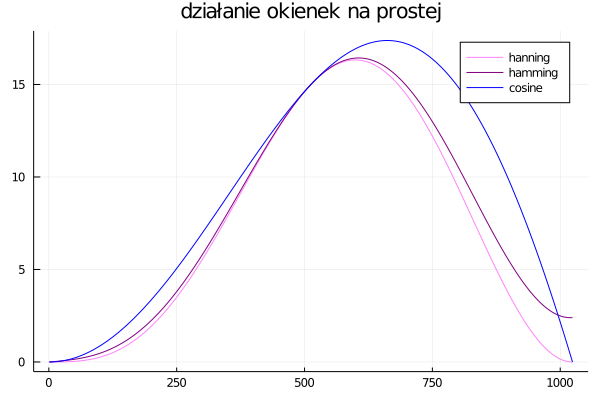

In [23]:
plot(m .* hanning_f,linecolor = :orchid1, label = "hanning", title = "działanie okienek na prostej")
plot!( m .* hamming_f, linecolor = :purple, label = "hamming")
plot!(m .* cosine_f,linecolor = :blue, label = "cosine")

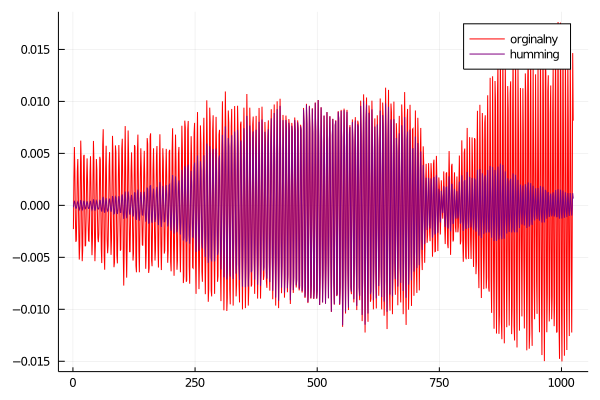

In [69]:
plot( bird[1][20000: 20000+1023], linecolor= :red, label = "orginalny")
plot!(bird[1][20000: 20000+1023] .* hamming_f, linecolor = :purple, label = "humming" )

2) proba samplowania

In [63]:
sound = bird[1][:,1]
wind = 1024 #rozmiar sampla
len = length(sound) # ilosc probek skladajaca sie na nagranie
st = 300 #step - przesuniecie
ile_sampli  = (len-wind) ÷ st # wyliczam ile smapli wyjdzie przy powyzszych parametrach
slices = Array{Any}(undef,ile_sampli,wind); #pusta tablica

In [64]:
for i in 1:ile_sampli
    slices[i, 1:wind] = sound[1+(i-1)*st : wind + (i-1)*st]
end

In [66]:
slices # każdy wiersz to koejny sampel, można łatwo zrobić zeby kolumny byly samplami(transpozycja)

552×1024 Array{Any,2}:
  0.00186163   -0.00061037   -0.00158696   …  -0.000274667   3.05185e-5
 -0.000671407  -0.000793481   0.000274667     -0.000152593  -0.000305185
  0.000335704   0.000396741   0.000488296      0.000122074   9.15555e-5
  0.000427259   0.000122074  -3.05185e-5       3.05185e-5    0.0
 -0.000305185  -0.00021363   -0.000366222     -6.1037e-5    -3.05185e-5
  0.000427259   0.000579852   0.000274667  …   0.000152593  -0.000183111
  0.000579852   0.000640889   0.000274667     -0.000305185  -0.000579852
 -0.00021363   -9.15555e-5   -9.15555e-5      -0.000732444  -0.000824
  0.000396741   6.1037e-5    -0.000366222     -6.1037e-5     0.000183111
  0.000335704   0.000122074   9.15555e-5       0.000244148   0.000244148
  0.000274667   0.000152593   0.000122074  …  -0.000152593   0.000152593
 -0.000427259  -0.00021363    9.15555e-5       0.00021363    0.000122074
  0.000366222   6.1037e-5     0.000244148      0.00021363    6.1037e-5
  ⋮                                        ⋱

In [72]:
a = slices .* transpose(hamming_f)

552×1024 Array{Float64,2}:
  0.00014893   -4.88349e-5   -0.000127012  …  -2.19757e-5    2.44148e-6
 -5.37126e-5   -6.34854e-5    2.19829e-5      -1.22087e-5   -2.44148e-5
  2.68563e-5    3.17427e-5    3.90806e-5       9.76698e-6    7.32444e-6
  3.41807e-5    9.76698e-6   -2.44254e-6       2.44175e-6    0.0
 -2.44148e-5   -1.70922e-5   -2.93105e-5      -4.88349e-6   -2.44148e-6
  3.41807e-5    4.63932e-5    2.19829e-5   …   1.22087e-5   -1.46489e-5
  4.63881e-5    5.12767e-5    2.19829e-5      -2.44175e-5   -4.63881e-5
 -1.70904e-5   -7.32524e-6   -7.32762e-6      -5.86019e-5   -6.592e-5
  3.17392e-5    4.88349e-6   -2.93105e-5      -4.88349e-6    1.46489e-5
  2.68563e-5    9.76698e-6    7.32762e-6       1.9534e-5     1.95318e-5
  2.19733e-5    1.22087e-5    9.77016e-6   …  -1.22087e-5    1.22074e-5
 -3.41807e-5   -1.70922e-5    7.32762e-6       1.70922e-5    9.76592e-6
  2.92978e-5    4.88349e-6    1.95403e-5       1.70922e-5    4.88296e-6
  ⋮                                        ⋱  

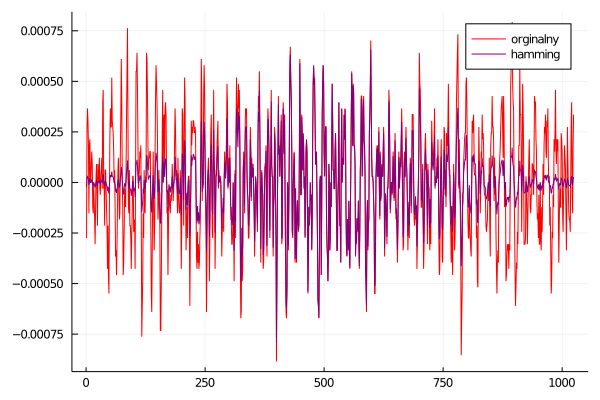

In [78]:
plot(slices[150,1:end], linecolor = :red, label = "orginalny")
plot!(a[150,1:end], linecolor = :purple, label = "hamming")

In [79]:
fft_slices = fft(transpose(a)) #transponuje bo fft działa chyba na kolumach

1024×552 Array{Complex{Float64},2}:
 -0.00787227+0.0im          …  -0.000159226-0.00515655im
 -0.00311619-0.000131192im      -0.00643935-0.000204092im
 -0.00411177+0.000254288im      -0.00636884-0.00177473im
 -0.00552111-0.00104781im        0.00691439-0.000379079im
 -0.00357592+0.00104894im        -0.0142867-0.00267278im
 -0.00458457-0.000261729im  …    -0.0032827-0.00164755im
 -0.00351909+0.00526611im       -0.00846559+0.000394637im
 -0.00606636-0.00892506im        0.00230087-0.00528585im
 -0.00387505+0.00296412im       -0.00651989-0.000601697im
 -0.00400721+0.00039958im       -0.00450894-0.00238376im
 -0.00670709-0.00141541im   …   -0.00536002-0.000165126im
 -0.00324471+0.00106941im       -0.00419721-0.00297008im
 -0.00445976-0.000214944im      -0.00475016-0.00228495im
            ⋮               ⋱  
 -0.00445976+0.000214944im      -0.00388751-0.00122499im
 -0.00324471-0.00106941im       -0.00264473-0.00310438im
 -0.00670709+0.00141541im       -0.00737477+0.00129731im
 -0.00400721-0.

In [107]:
spectrum = real.(fft_slices) # ti probowalam zrobic spectogram ale mi nie wyszlo,  wrzucam co znalzlam w roznych miejscach 
# usune pozniej

1024×552 Array{Float64,2}:
 -0.00787227  -0.000159226   0.000606801  …   0.000606801  -0.000159226
 -0.00311619  -0.00634419    0.000754427      0.000641219  -0.00643935
 -0.00411177  -0.00457898    0.000584316      0.000700519  -0.00636884
 -0.00552111  -0.00242127    0.00367421       0.00102918    0.00691439
 -0.00357592  -0.00617135   -0.00140261       0.000100643  -0.0142867
 -0.00458457  -0.00419034    0.00140338   …   0.000622896  -0.0032827
 -0.00351909  -0.00483194    0.00119966      -0.00244743   -0.00846559
 -0.00606636  -0.00368568    0.00124626       0.00517199    0.00230087
 -0.00387505  -0.0045427     0.00127689      -0.00107916   -0.00651989
 -0.00400721  -0.0037974    -0.00193646      -0.000174908  -0.00450894
 -0.00670709  -0.00737477    0.0136242    …   0.000970285  -0.00536002
 -0.00324471  -0.00264473   -0.00680839      -0.000555852  -0.00419721
 -0.00445976  -0.00388751    0.00189309       0.000404255  -0.00475016
  ⋮                                       ⋱   ⋮    

In [ ]:
"""f, ax = subplots(figsize=(4.8, 2.4))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');"""# spipy

S = abs.(fft_slices)

X = log10.(S / maximum(S))
imshow(X, cmp = "")

In [82]:
plot(spectrogram(sound, div(length(sound), 8),div(div(length(sound), 8), 2)))

LoadError: [91mCannot convert DSP.Periodograms.Spectrogram{Float64,AbstractFFTs.Frequencies{Float64}} to series data for plotting[39m

In [ ]:
using DSP

#function plot_spectrogram(s, fs)
s= sound
fs = 22050
    hwindow = 25e-6
    overlap = 10e-6
    S = spectrogram(s[:], round(Int, hwindow*fs),
                    round(Int, overlap*fs); window=hanning)
    t = time(S)
    f = freq(S)
    imshow(flipdim(log10.(power(S)), 1), extent=[first(t), last(t),
             fs*first(f), fs*last(f)], aspect="auto")
    S
end
